In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

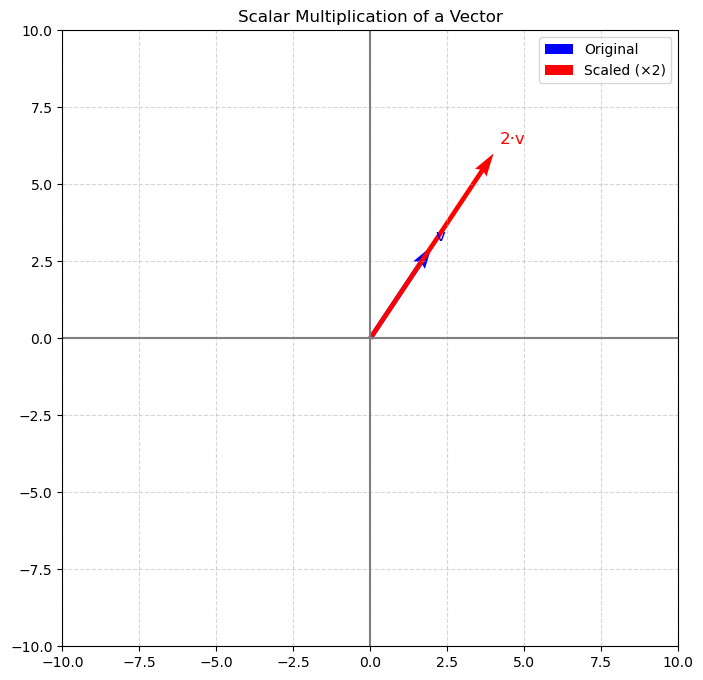

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def draw_scalar_multiplication(vector, scalar):
    """
    Draws a vector and its scalar multiple from the origin (0, 0).
    """
    vector = np.array(vector)
    scaled = scalar * vector

    # Setup plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')

    # Draw original vector
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original')

    # Draw scaled vector
    ax.quiver(0, 0, scaled[0], scaled[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Scaled (×{scalar})')

    # Annotations
    ax.text(vector[0]*1.05, vector[1]*1.05, 'v', color='blue', fontsize=12)
    ax.text(scaled[0]*1.05, scaled[1]*1.05, f'{scalar}·v', color='red', fontsize=12)

    plt.title("Scalar Multiplication of a Vector")
    plt.legend()
    plt.show()

draw_scalar_multiplication([2, 3], 2)


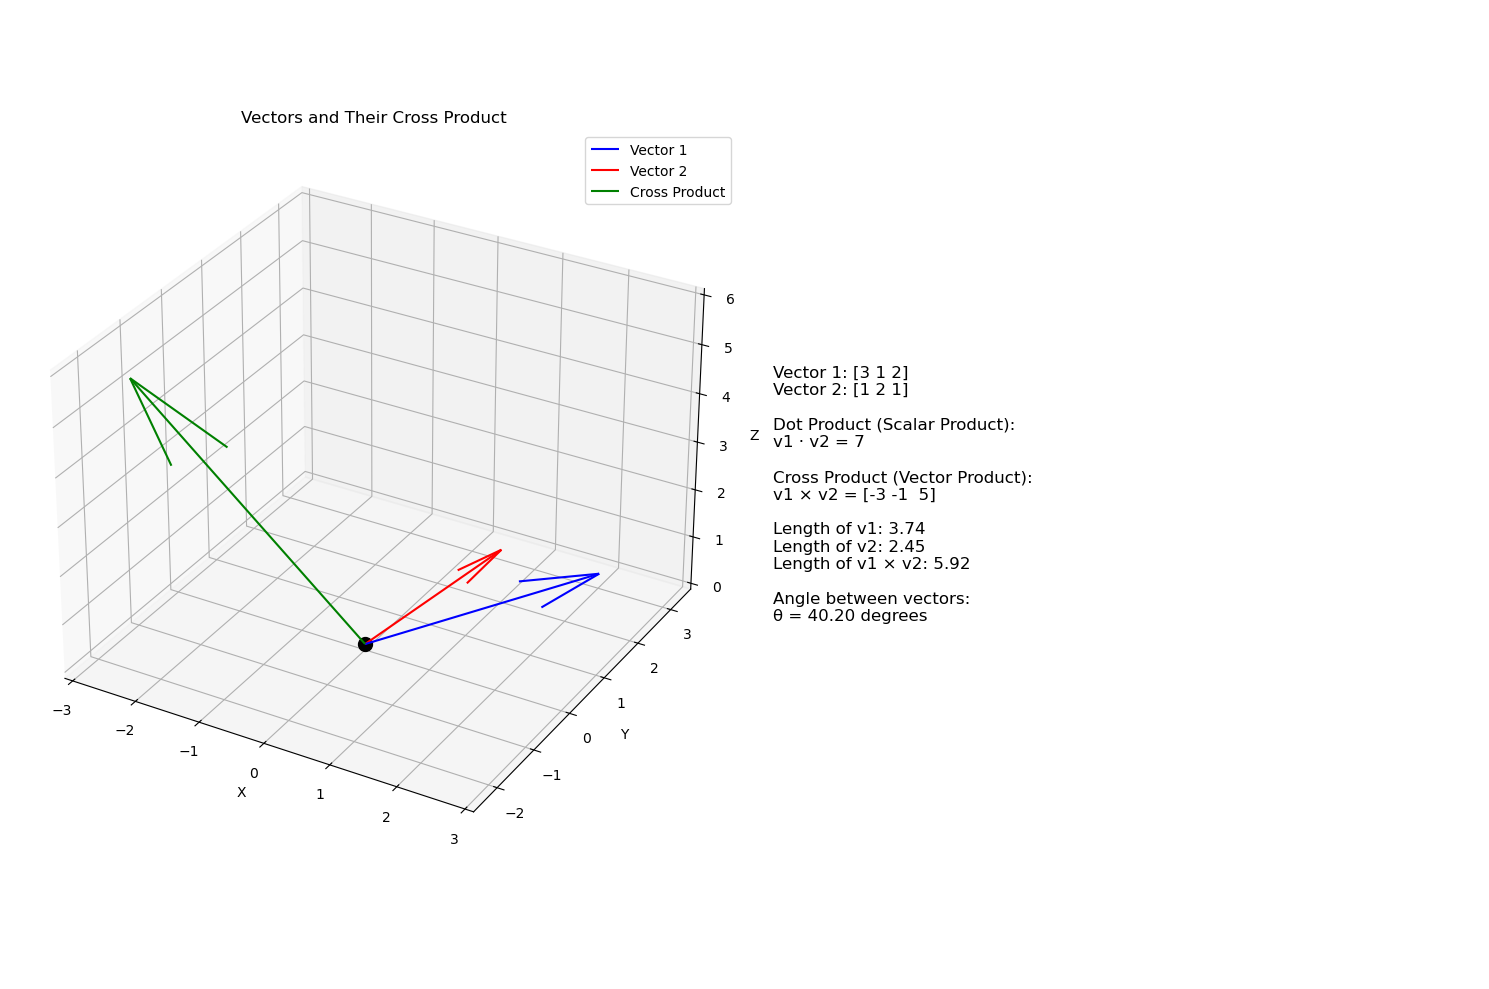

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vector_multiplication(vector1, vector2):
    """
    Visualizes two vectors and demonstrates different multiplication operations:
    1. Dot product (scalar product)
    2. Cross product (vector product)
    
    Parameters:
    vector1, vector2: lists or arrays of 3 elements [x, y, z]
    """
    # Convert to numpy arrays
    v1 = np.array(vector1)
    v2 = np.array(vector2)
    
    # Calculate products
    dot_product = np.dot(v1, v2)
    cross_product = np.cross(v1, v2)
    
    # Create 3D plot
    fig = plt.figure(figsize=(15, 10))
    
    # First subplot for vectors
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Plot origin
    ax1.scatter([0], [0], [0], color='k', s=100)
    
    # Plot the two vectors
    ax1.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', label='Vector 1')
    ax1.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='red', label='Vector 2')
    
    # Plot cross product vector
    ax1.quiver(0, 0, 0, cross_product[0], cross_product[1], cross_product[2], 
              color='green', label='Cross Product')
    
    # Set labels and title
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Vectors and Their Cross Product')
    
    # Set equal aspect ratio
    max_range = np.array([
        max([v1[0], v2[0], cross_product[0]]) - min([v1[0], v2[0], cross_product[0]]),
        max([v1[1], v2[1], cross_product[1]]) - min([v1[1], v2[1], cross_product[1]]),
        max([v1[2], v2[2], cross_product[2]]) - min([v1[2], v2[2], cross_product[2]])
    ]).max() / 2.0
    
    mid_x = (max([v1[0], v2[0], cross_product[0]]) + min([v1[0], v2[0], cross_product[0]])) * 0.5
    mid_y = (max([v1[1], v2[1], cross_product[1]]) + min([v1[1], v2[1], cross_product[1]])) * 0.5
    mid_z = (max([v1[2], v2[2], cross_product[2]]) + min([v1[2], v2[2], cross_product[2]])) * 0.5
    
    ax1.set_xlim(mid_x - max_range, mid_x + max_range)
    ax1.set_ylim(mid_y - max_range, mid_y + max_range)
    ax1.set_zlim(mid_z - max_range, mid_z + max_range)
    
    ax1.legend()
    
    # Second subplot for information
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    
    # Display information
    info_text = f"""
    Vector 1: {v1}
    Vector 2: {v2}
    
    Dot Product (Scalar Product):
    v1 · v2 = {dot_product}
    
    Cross Product (Vector Product):
    v1 × v2 = {cross_product}
    
    Length of v1: {np.linalg.norm(v1):.2f}
    Length of v2: {np.linalg.norm(v2):.2f}
    Length of v1 × v2: {np.linalg.norm(cross_product):.2f}
    
    Angle between vectors:
    θ = {np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))) * 180 / np.pi:.2f} degrees
    """
    
    ax2.text(0, 0.5, info_text, fontsize=12, va='center')
    
    plt.tight_layout()
    plt.show()

# Example usage
vector1 = [3, 1, 2]
vector2 = [1, 2, 1]
visualize_vector_multiplication(vector1, vector2)

In [8]:
import numpy as np

def solve_linear_system(coefficients, constants):
    """
    Function to solve a system of linear equations with any number of unknowns
    
    :param coefficients: Coefficient matrix of the equations. nxn matrix
    :param constants: Vector of constant terms [b1, b2, ..., bn]
    :return: Solution of the system and details of calculation method
    """
    
    # Convert inputs to numpy arrays
    A = np.array(coefficients, dtype=float)
    b = np.array(constants, dtype=float)
    
   # Validate input dimensions
    n = b.shape[0]  # Number of equations/unknowns
    if A.shape != (n, n):
        raise ValueError(f"Input must be a system of {n} equations with {n} unknowns")
        
    results = {}
    
    det_A = np.linalg.det(A)
    
    if abs(det_A) < 1e-10:
        results["inverse"] = "Cannot compute inverse (singular matrix)"
    else:
        # Calculate inverse of coefficient matrix
        A_inv = np.linalg.inv(A)  # 1/det * adj = 1/det * [Cof^T}
        
        # Calculate solution x = A^(-1) * b
        solution = np.dot(A_inv, b)
        
        results["inverse"] = {
            "A_inverse": A_inv.tolist(),
            "solution": solution.tolist()
        }
       
    return results

# Example system:
# 3x + 2y = 14
# 2x + 5y = 19
coefficients = [[2, 3], [1, -1]]
constants = [13, -1]

results = solve_linear_system(coefficients, constants)

print("System of equations:")
print(f"{coefficients[0][0]}x + {coefficients[0][1]}y = {constants[0]}")
print(f"{coefficients[1][0]}x + {coefficients[1][1]}y = {constants[1]}")
print("\nResults:")

for method, result in results.items():
    if isinstance(result, dict):
        if "solution" in result:
            print(f"Solution: x = {result['solution'][0]:.2f}, y = {result['solution'][1]:.2f}")
        for key, value in result.items():
            if key != "solution":
                print(f"{key}: {value}")
    else:
        print(result)

'''
x+y+z=6(1)
2x+y+z=8(2)
x+2y+z=7(3)
'''
print()
print()
coefficients = [[1, 1, 1], [2, 1, 1], [1, 2, 1]]
constants = [6, 8, 7]

results = solve_linear_system(coefficients, constants)

print("System of equations:")
print(f"{coefficients[0][0]}x + {coefficients[0][1]}y = {constants[0]}")
print(f"{coefficients[1][0]}x + {coefficients[1][1]}y = {constants[1]}")
print("\nResults:")

for method, result in results.items():
    if isinstance(result, dict):
        if "solution" in result:
            print(f"Solution: x = {result['solution'][0]:.2f}, y = {result['solution'][1]:.2f} , z = {result['solution'][2]:.2f}")
        for key, value in result.items():
            if key != "solution":
                print(f"{key}: {value}")
    else:
        print(result)



System of equations:
2x + 3y = 13
1x + -1y = -1

Results:
Solution: x = 2.00, y = 3.00
A_inverse: [[0.19999999999999998, 0.6000000000000001], [0.2, -0.4]]


System of equations:
1x + 1y = 6
2x + 1y = 8

Results:
Solution: x = 2.00, y = 1.00 , z = 3.00
A_inverse: [[-0.9999999999999998, 1.0, -5.551115123125783e-17], [-0.9999999999999999, 0.0, 1.0], [2.9999999999999996, -1.0, -0.9999999999999999]]
